In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
# from sklearn.metrics.pairwise import cosine_similarity

df_data_org = pd.read_json("./data/test.json", lines=True)
df_data_org.head()

ModuleNotFoundError: No module named 'sklearn'

apply cosine similarity & euclidean distance to intersection & sum of sets each

## Get cosine similarity based on Score

In [125]:
df_data = df_data_org.copy()
df_data

,id,user_id,item_id,join
0,0,0,0,0
1,1,0,1,0
2,2,0,1,0
3,3,0,0,0
4,4,0,1,0
...,...,...,...,...
96899,96899,67,1680,0
96900,96900,67,1943,0
96901,96901,67,1943,0
96902,96902,67,267,0


In [140]:
def get_count(value):
    res = dict()
    res['apply_cnt'] = value['id'].count()
    res['join_cnt'] = value['join'].sum()
    res['ratio'] = res['join_cnt'] / res['apply_cnt']
    return pd.Series(res, index=res.keys())

df_grouped = df_data.groupby(['user_id', 'item_id']).apply(get_count)
df_grouped.reset_index(inplace=True)

In [162]:
df_grouped

,user_id,item_id,apply_cnt,join_cnt,ratio
0,0,0,3.0,0.0,0.000
1,0,1,3.0,0.0,0.000
2,0,2,2.0,1.0,0.500
3,0,3,8.0,1.0,0.125
4,0,7,5.0,1.0,0.200
...,...,...,...,...,...
28557,69,1930,1.0,0.0,0.000
28558,69,1931,3.0,0.0,0.000
28559,69,1932,1.0,0.0,0.000
28560,69,1935,2.0,0.0,0.000


In [186]:
def make_group(value):
    res = dict()
    data = value.to_dict(orient='records')
    for row in data:
        res[row['item_id']] = row['ratio']
    return res

test = df_grouped.groupby('user_id').apply(make_group)

In [192]:
test = test.to_dict()

In [218]:
def get_cosine_similarity(target:dict, check:dict):
    full_items = set(list(target.keys()) + list(check.keys()))
    list_target = list()
    list_check = list()
    for idx in full_items:
        if target.get(idx) == None:
            list_target.append(0)
        else:
            if target.get(idx) >=0.5:
                list_target.append(1)
            else:
                list_target.append(-1)
        
        if check.get(idx) == None:
            list_check.append(0)
        else:
            if check.get(idx) >=0.5:
                list_check.append(1)
            else:
                list_check.append(-1)

    return np.dot(list_target,list_check)/( np.linalg.norm(list_target)*np.linalg.norm(list_check))


In [222]:
res_data = dict()
for target_idx, target_user in test.items():
    check_data =dict()
    for check_idx, check_user in test.items():
        check_data[check_idx] = get_cosine_similarity(target_user, check_user)
    res_data[target_idx] = check_data

<AxesSubplot: >

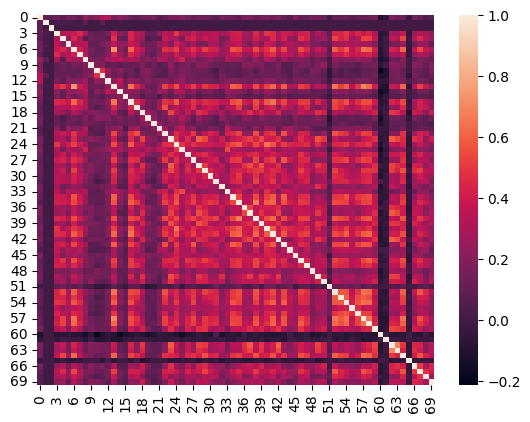

In [227]:
cos_matrix = pd.DataFrame(res_data)
sns.heatmap(cos_matrix)

In [257]:
top_10 = dict()
for idx, rows in res_data.items():
    # sorted(res_data[0].items(), key= lambda x: x[1], reverse=True)[:10]
    top_10[idx] = sorted(rows.items(), key= lambda x: x[1], reverse=True)[1:11]

top_10

{0: [(12, 0.3383169858756222),
  (11, 0.3181582090733561),
  (8, 0.23959399259138012),
  (14, 0.22239514059198662),
  (10, 0.21892243263110578),
  (45, 0.19038732824113438),
  (25, 0.18901224082908696),
  (62, 0.17376326020390023),
  (37, 0.17149228039515296),
  (15, 0.17126030981362617)],
 1: [(0, 0.0997509336107633),
  (11, 0.09245003270420486),
  (8, 0.08006407690254358),
  (3, 0.03316790634033297),
  (5, 0.03117398431942748),
  (4, 0.020323692028323077),
  (6, 0.01644212078889967),
  (2, 0.0),
  (7, 0.0),
  (9, 0.0)],
 2: [(0, 0.08638684255813601),
  (1, 0.0),
  (3, 0.0),
  (4, 0.0),
  (5, 0.0),
  (6, 0.0),
  (7, 0.0),
  (8, 0.0),
  (9, 0.0),
  (10, 0.0)],
 3: [(24, 0.4894330187641478),
  (40, 0.4888297664988823),
  (54, 0.48002400180015),
  (41, 0.45239428338487103),
  (38, 0.45031683899680425),
  (7, 0.44690491452540876),
  (16, 0.4413281182732785),
  (56, 0.44045659138732596),
  (53, 0.4394431495458722),
  (52, 0.43182299477754604)],
 4: [(52, 0.5359851979507323),
  (64, 0.52711